In [2]:
import numpy
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [3]:
def load_data(filename):
    Data = numpy.empty((20,0))
    for k in range(7):
        file_number = (k*5)+10
        FileName = '%s.csv' % file_number 
        FileName = filename + FileName
        #print(FileName)
        x = genfromtxt(FileName, delimiter=',')
        # Remove NAN
        x = x[1:]
        x1 = x[:,1, numpy.newaxis]
        x2 = x[:,3, numpy.newaxis]
        Data = numpy.append(Data,x1, axis=1)
        Data = numpy.append(Data,x2, axis=1)
    return Data

In [4]:
data_1 = load_data('MLP_No_SKIP_')
data_2 = load_data('MLP_No_SKIP_No_BN_')
data_3 = load_data('MLP_SKIP_')

Data = numpy.concatenate((data_1, data_2, data_3), axis=1)

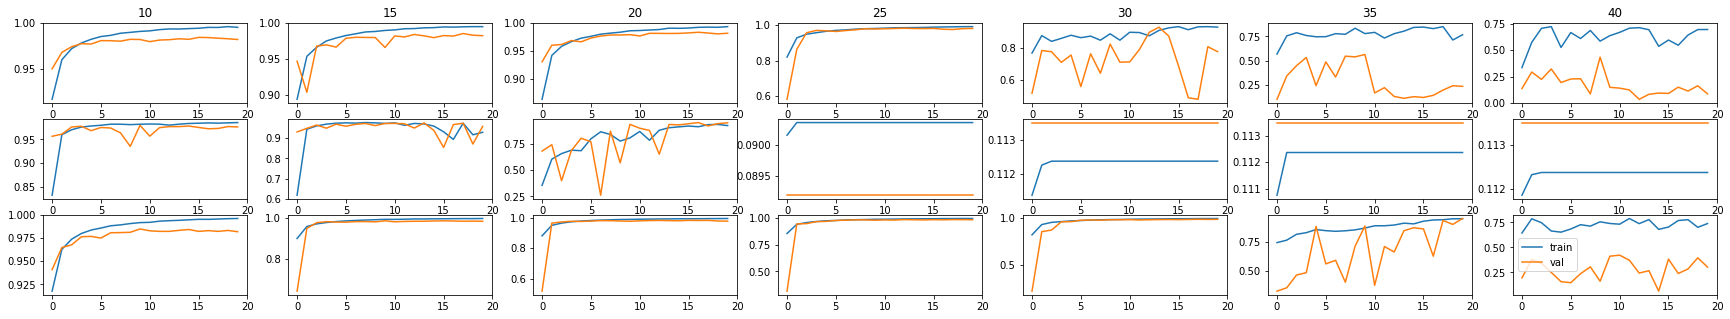

In [7]:
plt.figure(1, figsize=(30,5))
for k in range(21):
    x1 = Data[:,k*2]
    x2 = Data[:,k*2+1]
    plt.subplot(3, 7, k+1)
    plt.plot(x1)
    plt.plot(x2)
    n_layers = (k*5)+10
    if k<7: plt.title(n_layers)
plt.legend(['train', 'val'])
plt.show()

In [8]:
val_data_all = Data[-1,:, numpy.newaxis]

In [9]:
val_data_all_train = val_data_all[::2]
val_data_all_test = val_data_all[1::2]
x = val_data_all_test.reshape(3, 7)

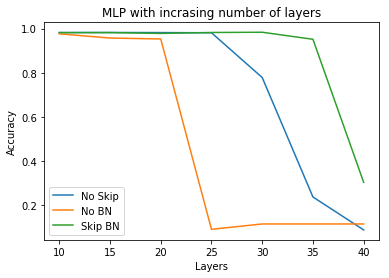

In [10]:
y = [10, 15, 20, 25, 30, 35, 40]
plt.plot(y, x[0,:])
plt.plot(y, x[1,:])
plt.plot(y, x[2,:])
plt.xlabel('Layers')
plt.ylabel('Accuracy')
plt.title('MLP with incrasing number of layers')
plt.legend(['No Skip', 'No BN', 'Skip BN'])
plt.show()